In [1]:
print('Data Story: Evaluation of Drug Consumption Risk')
import pandas as pd
import urllib
u=urllib.urlopen('http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29')
text=u.read()
import re
matches=re.findall(r"\d+\.\s\w+", text)
del(matches[0:3])
del(matches[12])
for i in range(0, len(matches)):
    matches[i]=re.sub(r"\d+\.\s","",matches[i])
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
data = pd.read_csv(url,names=matches) #import data

Data Story: Evaluation of Drug Consumption Risk


In [2]:
#Create Binary variable seperating use by those who use at a month frequecy or more
data=data.replace(['CL0','CL1','CL2','CL3'],0)
data=data.replace(['CL4','CL5','CL6'],1)
#coorelate attributes with drug use
coormat=data.corr()
print(data.head())
#make scatterplot matrix
#for each drug find the top 3 correlated attributes make scatterplots

   ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore ...   Ecstasy  Heroin  Ketamine  Legalh  LSD  Meth  \
0 -0.58331 -0.91699 ...         0       0         0       0    0     0   
1  1.43533  0.76096 ...         1       0         0       0    0     0   
2 -0.84732 -1.62090 ...         0       0         0       0    0     0   
3 -0.01928  0.59042 ...         0       0         0       0    0     0   
4 -0.45174 -0.30172 ...         0       0         0       0    0     0   

   Mushrooms  Nicotine  Semer  VSA  
0          0         0      0    0  
1          0         1  

Characteristics of Population Surveyed
Can I count something interesting?
Data is more representative of young adults than older adults
How does age trend with education?
       Age  Education  Counts
0 -0.95197   -2.43591       9
1 -0.95197   -1.73790      16
2 -0.95197   -1.43719      12
3 -0.95197   -1.22751      61
4 -0.95197   -0.61113     331
Index([u'Age', u'Education', u'Counts'], dtype='object')


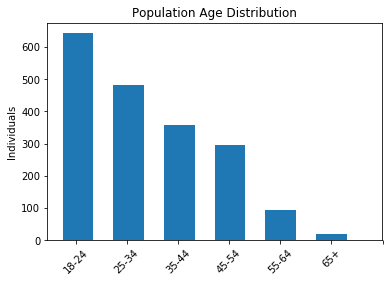

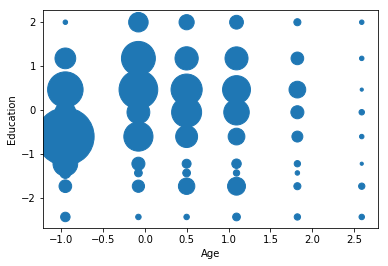

In [3]:
#Count something interesting
print('Characteristics of Population Surveyed')
print('Can I count something interesting?')
import matplotlib.pyplot as py
%matplotlib inline
#Age
age=['','18-24','25-34','35-44','45-54','55-64','65+']
ax=py.subplot(111)
py.hist(data.Age*.84+.17,bins=6,histtype='bar', align='mid',width=0.3)
py.ylabel('Individuals')
ax.set_xticklabels(age,rotation=45)
py.title('Population Age Distribution')
print('Data is more representative of young adults than older adults')
print('How does age trend with education?')
c=data[['Age','Education']].groupby(['Age','Education'], as_index=False).size()  #make age and education to become columns
c=c.rename('Counts') #rename count column
df=c.to_frame() #convert to dataframe
df.reset_index(inplace=True)
print(df.head()) # this displays the first few rows for me
print(df.columns) # this confirms for me that all the indices are gone
df.plot.scatter(x='Age', y='Education', s=df['Counts']*10) 

#ax.scatter(c.Age,c.Education)#,c.iloc[:,2]) #How do I make a bubble plot?

What is the drug use in this population?
    Alcohol   Amphet      Amyl    Benzos      Caff  Cannabis     Choc  \
1  0.822812  0.12626  0.021751  0.158621  0.935809  0.418037  0.94748   
0  0.177188  0.87374  0.978249  0.841379  0.064191  0.581963  0.05252   

      Coke    Crack   Ecstasy    Heroin  Ketamine    Legalh       LSD  \
1  0.08435  0.01061  0.127321  0.028117   0.04191  0.127851  0.088064   
0  0.91565  0.98939  0.872679  0.971883   0.95809  0.872149  0.911936   

       Meth  Mushrooms  Nicotine     Semer       VSA  
1  0.090716    0.08435  0.464191  0.000531  0.018037  
0  0.909284    0.91565  0.535809  0.999469  0.981963  


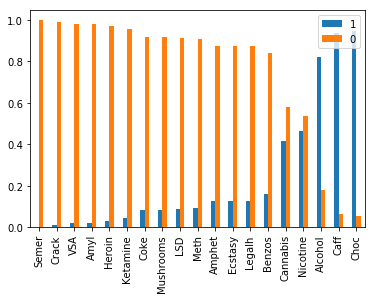

In [4]:
print('What is the drug use in this population?')
import numpy as np
drug_data=data.iloc[:,13:32]
columns=drug_data.columns
ddvc=pd.DataFrame()
for column in columns:
    ddvc[column]=drug_data[column].value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)#.sort_values() #frequency
print(ddvc.head())
ddvc1=ddvc.T
ddvc1.sort_values([1,0]).plot.bar()



In [40]:
print('Which attributes are the most coorelated to drug use?')
sub_coormat=coormat.iloc[13:,1:13]
for i in xrange(0,len(sub_coormat.iloc[:,0])):
    footop=sub_coormat.iloc[i,:].sort_values().head(3)
    foobot=sub_coormat.iloc[i,:].sort_values().tail(3)
    mostcoor=abs(footop).append(abs(foobot)).sort_values(ascending=False).head(3)
    py.figure(i)
    py.subplot(1,1,1)
    py.scatter(data[sub_coormat.index[i]], data[mostcoor.index[0]])
    py.xlabel(sub_coormat.index[i])
    py.ylabel(mostcoor.index[0])
   # py.title(concat('Strongest Coorelated to ',sub_coormat.index[0]))

Which attributes are the most coorelated to drug use?


ValueError: num must be 1 <= num <= 0, not 1